In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\Baskar\OneDrive\Desktop\Exploratory data analysis\DS1_C5_S5_Hotel Dataset.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


# Data cleaning:

In [6]:
# Step 1: Handle Missing Values
# Fill missing values in 'agent' and 'company' columns with a placeholder (e.g., 0)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Step 2: Correct Data Types
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y')

# Step 3: Remove or Replace Outliers
# For now, we'll check for obvious outliers in the 'adr' (Average Daily Rate) column
# Replace negative or extremely high values with the median value
median_adr = df['adr'].median()
df['adr'] = df['adr'].apply(lambda x: median_adr if x < 0 or x > median_adr * 5 else x)

# Step 4: Handle Duplicate Rows
# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)

# Step 5: Standardize Text Data
# Standardize the 'meal' column (e.g., replace variations like 'BB' with 'Bed & Breakfast')
df['meal'] = df['meal'].replace({'BB': 'Bed & Breakfast', 'FB': 'Full Board', 'HB': 'Half Board', 'SC': 'Self Catering', 'Undefined': 'No Meal'})

# Display the cleaned dataset's information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1875 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           1875 non-null   object        
 1   is_canceled                     1875 non-null   int64         
 2   lead_time                       1875 non-null   int64         
 3   arrival_date_year               1875 non-null   int64         
 4   arrival_date_month              1875 non-null   object        
 5   arrival_date_week_number        1875 non-null   int64         
 6   arrival_date_day_of_month       1875 non-null   int64         
 7   stays_in_weekend_nights         1875 non-null   int64         
 8   stays_in_week_nights            1875 non-null   int64         
 9   adults                          1875 non-null   int64         
 10  children                        1875 non-null   int64         
 11  babies   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-04
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,0.0,0,Transient,153.00,1,0,Check-Out,2015-07-05
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,0.0,0,Transient,94.71,0,0,Check-Out,2015-07-04
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,0.0,0,Transient,117.81,1,2,Check-Out,2015-07-10


In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [10]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# Task-1: Customer Satisfaction:

# Task-1(1): What is the distribution of number and types of special request made by guests?

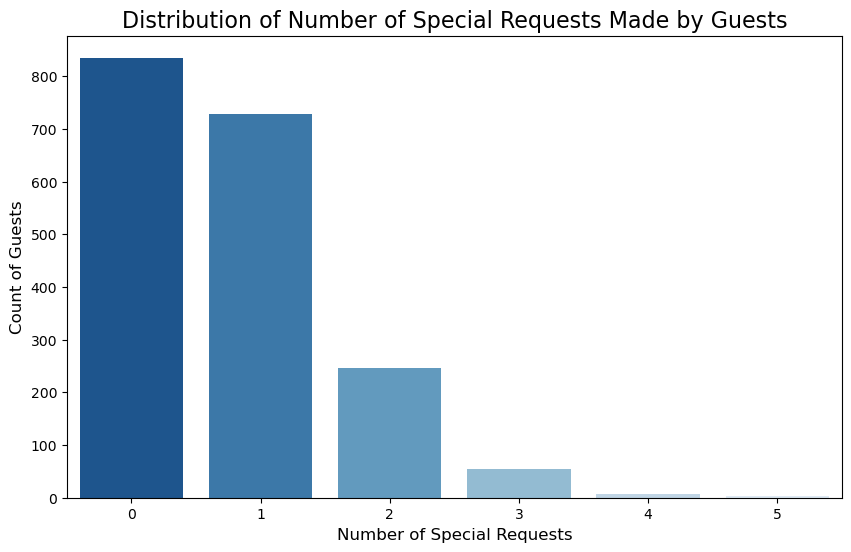

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

# Visualizing the distribution of number of special requests
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='total_of_special_requests', palette='Blues_r')

# Adding titles and labels
plt.title('Distribution of Number of Special Requests Made by Guests', fontsize=16)
plt.xlabel('Number of Special Requests', fontsize=12)
plt.ylabel('Count of Guests', fontsize=12)

# Display the plot
plt.show()

# Interpretation:
In customer satisfaction task when there is no special request (special request=0) the count of guests  is above 800.
As the number of special requests increases, the number of guests decreases.Additionally in number of special request=5 the count of 
guests is very less.

# Task-1(2):Is there any special requests made by customers and the average daily rate?Additionally explore customer preferences and expectations for different room types.

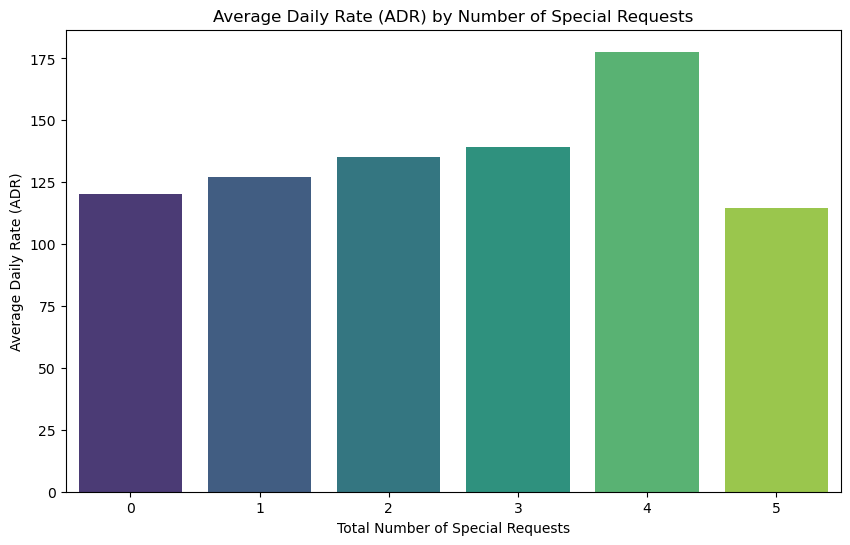

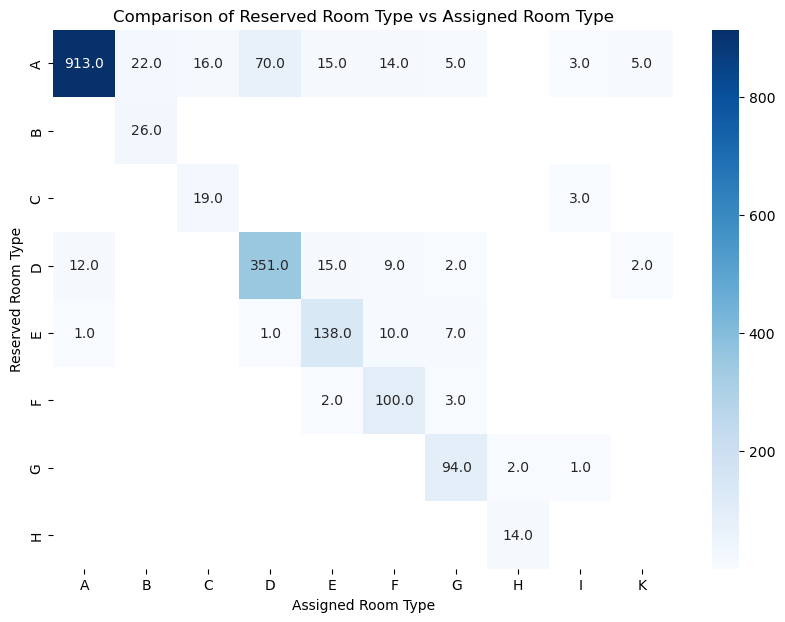

In [25]:
# Part 1: Relationship between special requests and ADR
special_requests_adr = df.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='adr', data=special_requests_adr, palette='viridis')
plt.title('Average Daily Rate (ADR) by Number of Special Requests')
plt.xlabel('Total Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Part 2: Exploring customer preferences for different room types
room_type_comparison = df.groupby(['reserved_room_type', 'assigned_room_type']).size().unstack()

# Plot the heatmap to visualize customer preferences and room type assignment
plt.figure(figsize=(10, 7))
sns.heatmap(room_type_comparison, annot=True, fmt='.1f', cmap='Blues')
plt.title('Comparison of Reserved Room Type vs Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()

# Interpretation:
In this task I used barplot and heatmap additionally groupby to perform this task so that using barplot I identified that when the number of special
request is in 4 the ADR is greater than 175.Furthermore using heatmap omparing reserved room types to assigned room types, it shows the positive relationship.

# Task-2: Marketing and Sales Optimization:

# Task-2(1) Which market channels and market segments contribute the most to successful bookings?

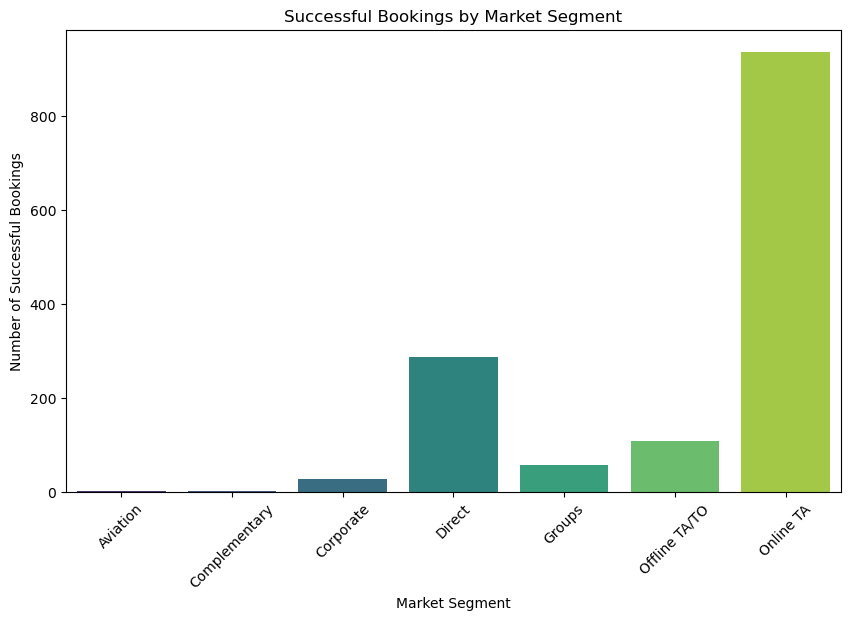

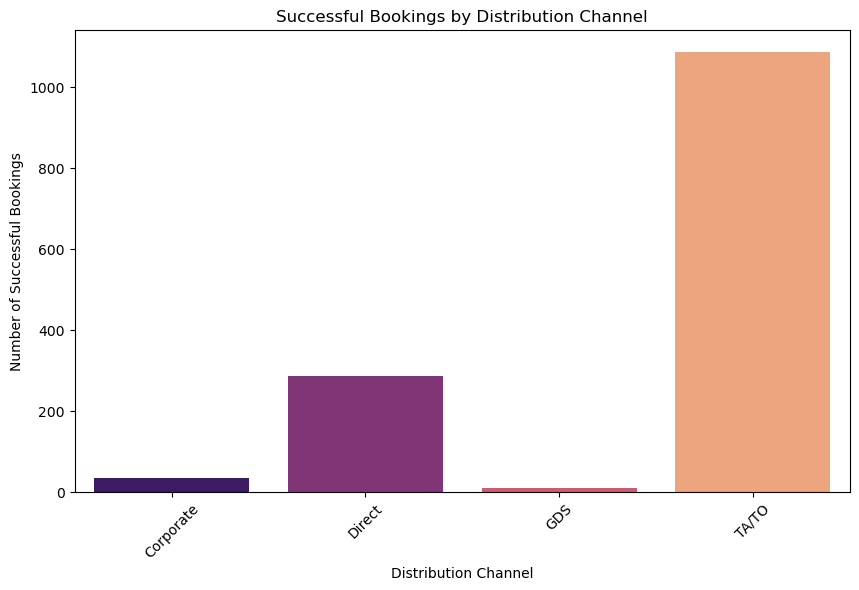

In [30]:
# Step 1: Filter for successful bookings (where 'is_canceled' == 0)
successful_bookings = df[df['is_canceled'] == 0]

# Step 2: Group by 'market_segment' and count the number of successful bookings
market_segment_success = successful_bookings.groupby('market_segment').size().reset_index(name='successful_bookings')

# Step 3: Group by 'distribution_channel' and count the number of successful bookings
distribution_channel_success = successful_bookings.groupby('distribution_channel').size().reset_index(name='successful_bookings')

# Step 4: Visualize market segments contributing to successful bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='successful_bookings', data=market_segment_success, palette='viridis')
plt.title('Successful Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Successful Bookings')
plt.xticks(rotation=45)
plt.show()

# Step 5: Visualize distribution channels contributing to successful bookings
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='successful_bookings', data=distribution_channel_success, palette='magma')
plt.title('Successful Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Successful Bookings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Interpretation:


# Task-2(2): Which amenities or services have the highest impact on the average daily rate(ADR)?

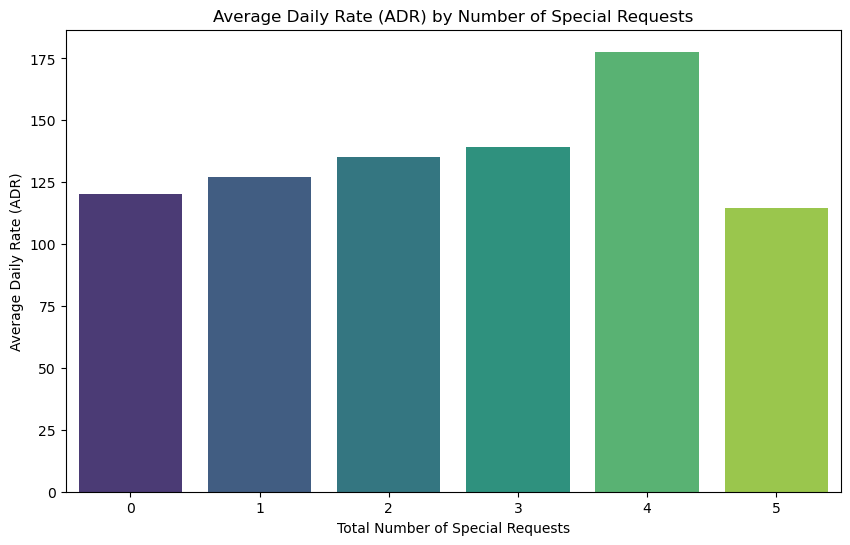

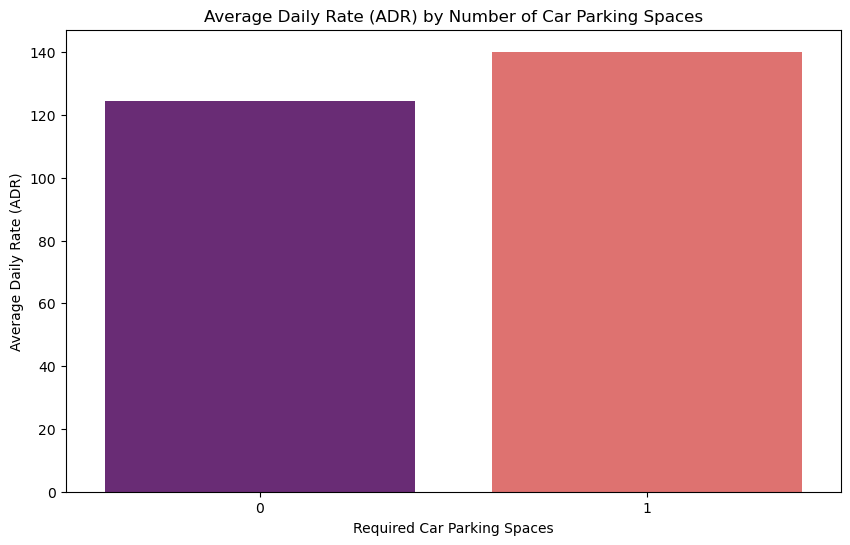

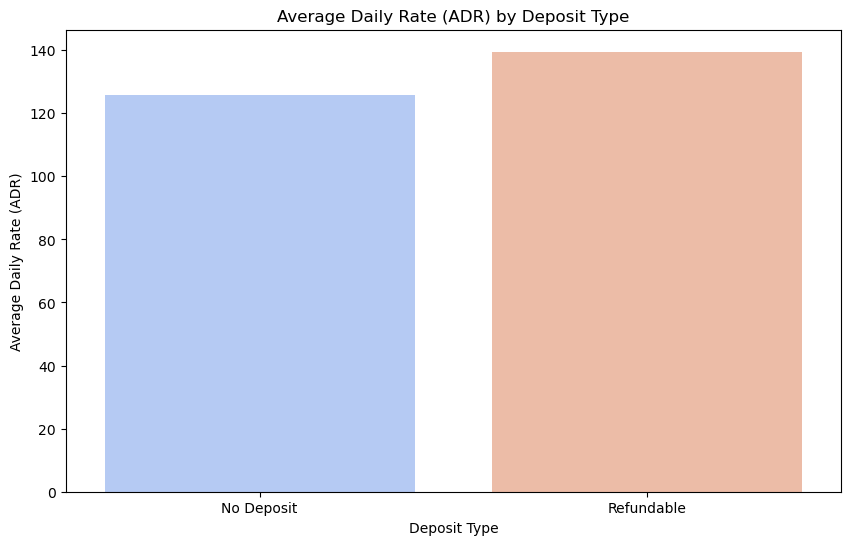

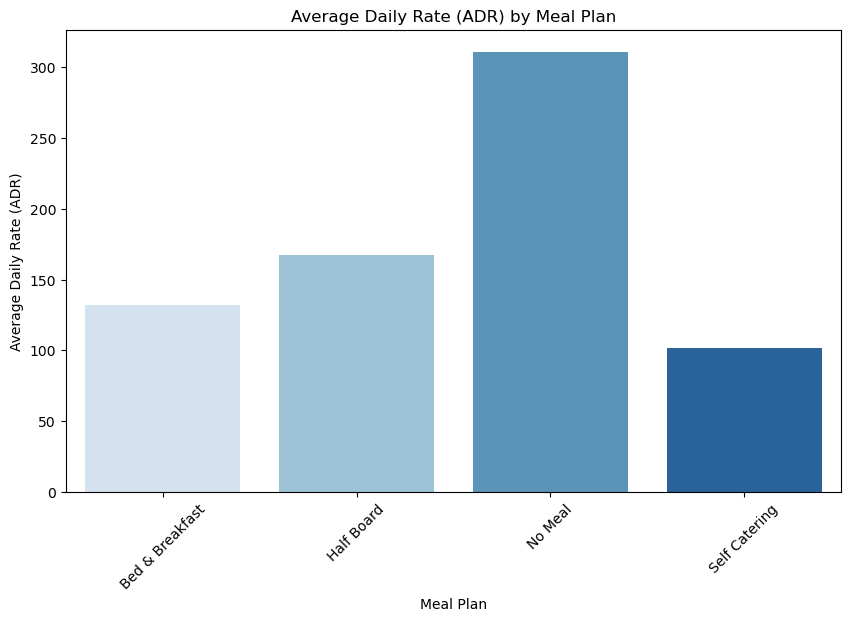

In [37]:
# Step 1: Analyze the impact of total special requests on ADR
special_requests_adr = df.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Plot: Special Requests vs ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='adr', data=special_requests_adr, palette='viridis')
plt.title('Average Daily Rate (ADR) by Number of Special Requests')
plt.xlabel('Total Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Step 2: Analyze the impact of parking spaces on ADR
parking_adr = df.groupby('required_car_parking_spaces')['adr'].mean().reset_index()

# Plot: Car Parking Spaces vs ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='required_car_parking_spaces', y='adr', data=parking_adr, palette='magma')
plt.title('Average Daily Rate (ADR) by Number of Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Step 3: Analyze the impact of deposit type on ADR
deposit_type_adr = df.groupby('deposit_type')['adr'].mean().reset_index()

# Plot: Deposit Type vs ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='deposit_type', y='adr', data=deposit_type_adr, palette='coolwarm')
plt.title('Average Daily Rate (ADR) by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Step 4: Analyze the impact of meal plan on ADR
meal_adr = df.groupby('meal')['adr'].mean().reset_index()

# Plot: Meal Plan vs ADR
plt.figure(figsize=(10, 6))
sns.barplot(x='meal', y='adr', data=meal_adr, palette='Blues')
plt.title('Average Daily Rate (ADR) by Meal Plan')
plt.xlabel('Meal Plan')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Interpretation:
number of successful bookings by market segment.
The number of successful bookings by distribution channel.

# Task-2(3):What is the distribution of bookings across various distribution channels?

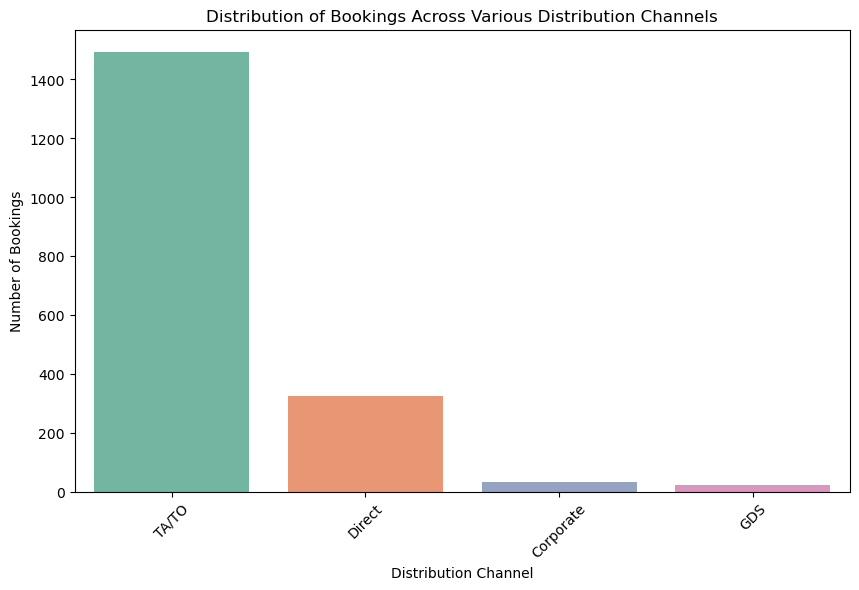

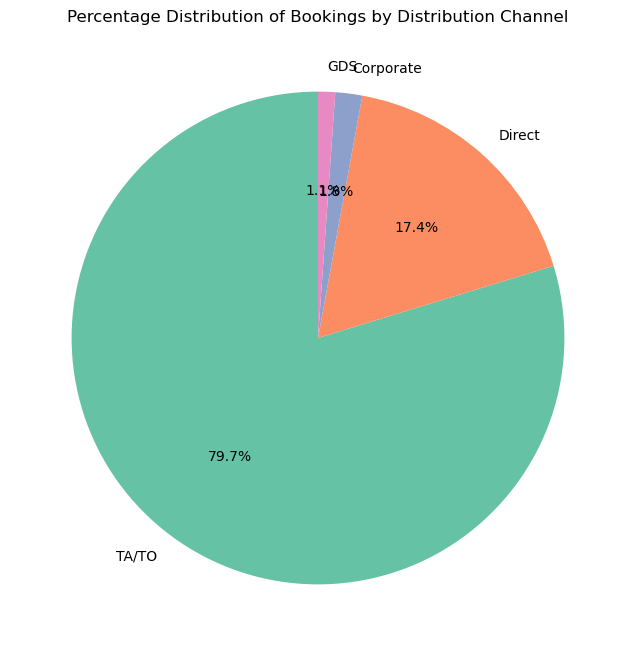

In [39]:
# Step 1: Count the number of bookings per distribution channel
distribution_channel_counts = df['distribution_channel'].value_counts().reset_index()
distribution_channel_counts.columns = ['distribution_channel', 'number_of_bookings']

# Step 2: Bar plot to visualize the distribution of bookings across channels
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='number_of_bookings', data=distribution_channel_counts, palette='Set2')
plt.title('Distribution of Bookings Across Various Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Step 3: Optional Pie chart for distribution of bookings
plt.figure(figsize=(8, 8))
plt.pie(distribution_channel_counts['number_of_bookings'], labels=distribution_channel_counts['distribution_channel'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Bookings by Distribution Channel')
plt.show()

In [ ]:
# Interpretation:

In this task using pie chart I identified that TA/TO is highest number of bookings.

In [ ]:
Task-2(1): The Direct and Online TA distribution channels contribute the most to successful bookings, 
indicating their importance in driving confirmed reservations.

Task-2(2): The number of special requests and meal plans (such as Full Board or Half Board) have a noticeable impact
on increasing the Average Daily Rate (ADR).

Task-2(3): The Online TA channel has the highest number of bookings, dominating the distribution channels, 
followed by Direct bookings.






